In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
#   y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [3]:
# Try a linear model first - note: it is classification now!
i= Input(shape=(T, ))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100


2022-03-16 11:59:56.227677: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 1s 3ms/step - loss: 0.7504 - accuracy: 0.4984 - val_loss: 0.7054 - val_accuracy: 0.4852
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5084 - val_loss: 0.6947 - val_accuracy: 0.5076
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5176 - val_loss: 0.6937 - val_accuracy: 0.5044
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5076 - val_loss: 0.6939 - val_accuracy: 0.4972
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5144 - val_loss: 0.6943 - val_accuracy: 0.5064
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5032 - val_loss: 0.6941 - val_accuracy: 0.5020
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4964 - val_loss: 0.6954 - val_accuracy: 0.4936
Epoch 8/100
79/79 [======

Epoch 59/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5036 - val_loss: 0.6941 - val_accuracy: 0.5064
Epoch 60/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5136 - val_loss: 0.6942 - val_accuracy: 0.5020
Epoch 61/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5200 - val_loss: 0.6941 - val_accuracy: 0.5028
Epoch 62/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4904 - val_loss: 0.6939 - val_accuracy: 0.5016
Epoch 63/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5056 - val_loss: 0.6940 - val_accuracy: 0.5020
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5028 - val_loss: 0.6945 - val_accuracy: 0.5056
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5060 - val_loss: 0.6944 - val_accuracy: 0.5012
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

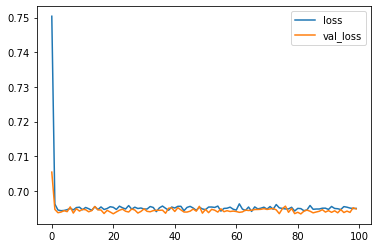

In [4]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

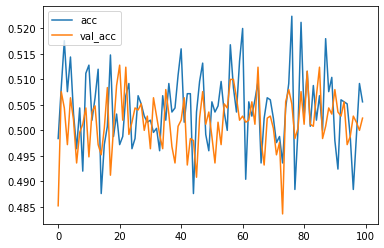

In [5]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
### Now try simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)
# x = LSTM(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy']
)

In [13]:
# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 0.7018 - accuracy: 0.4876 - val_loss: 0.6951 - val_accuracy: 0.5080
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4976 - val_loss: 0.6942 - val_accuracy: 0.5080
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4928 - val_loss: 0.6924 - val_accuracy: 0.5156
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5104 - val_loss: 0.6936 - val_accuracy: 0.5124
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5164
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5068 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5164 - val_loss: 0.6944 - val_accuracy: 0.5076
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8196 - val_loss: 0.4458 - val_accuracy: 0.8316
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8864 - val_loss: 0.2556 - val_accuracy: 0.9260
Epoch 61/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8824 - val_loss: 0.3753 - val_accuracy: 0.8668
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8612 - val_loss: 0.5025 - val_accuracy: 0.8028
Epoch 63/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8624 - val_loss: 0.2697 - val_accuracy: 0.9208
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8972 - val_loss: 0.5815 - val_accuracy: 0.7772
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8944 - val_loss: 0.2559 - val_accuracy: 0.9248
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9780 - val_loss: 0.1086 - val_accuracy: 0.9724
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9740 - val_loss: 0.0797 - val_accuracy: 0.9816
Epoch 118/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9812 - val_loss: 0.0836 - val_accuracy: 0.9804
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9812 - val_loss: 0.1545 - val_accuracy: 0.9600
Epoch 120/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1420 - accuracy: 0.9580 - val_loss: 0.1431 - val_accuracy: 0.9600
Epoch 121/200
79/79 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9656 - val_loss: 0.1182 - val_accuracy: 0.9656
Epoch 122/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9788 - val_loss: 0.1345 - val_accuracy: 0.9676
Epoch 123/200

79/79 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9748 - val_loss: 0.0873 - val_accuracy: 0.9748
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9840 - val_loss: 0.0855 - val_accuracy: 0.9792
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9840 - val_loss: 0.0826 - val_accuracy: 0.9800
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9668 - val_loss: 0.1002 - val_accuracy: 0.9736
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9784 - val_loss: 0.1391 - val_accuracy: 0.9636
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9800 - val_loss: 0.1039 - val_accuracy: 0.9772
Epoch 179/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9868 - val_loss: 0.0825 - val_accuracy: 0.9808
Epoch 180/200

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

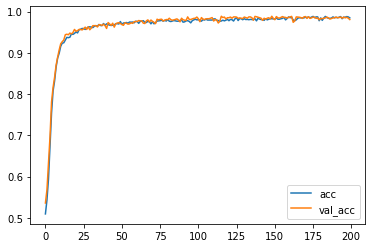

In [8]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [9]:
# Now change to the long distance problem
# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [10]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6980 - accuracy: 0.5088 - val_loss: 0.6913 - val_accuracy: 0.5336
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5536 - val_loss: 0.6829 - val_accuracy: 0.5712
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5504 - val_loss: 0.6953 - val_accuracy: 0.5048
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5480 - val_loss: 0.6814 - val_accuracy: 0.5648
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5548 - val_loss: 0.6748 - val_accuracy: 0.5952
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6080 - val_loss: 0.6764 - val_accuracy: 0.5972
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6200 - val_loss: 0.6698 - val_accuracy: 0.6136
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.9016 - val_loss: 0.4158 - val_accuracy: 0.8684
Epoch 60/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4091 - accuracy: 0.8572 - val_loss: 0.2637 - val_accuracy: 0.9288
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.8836 - val_loss: 0.3406 - val_accuracy: 0.8864
Epoch 62/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.9036 - val_loss: 0.2767 - val_accuracy: 0.9156
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.8972 - val_loss: 0.2896 - val_accuracy: 0.9128
Epoch 64/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3264 - accuracy: 0.8948 - val_loss: 0.2808 - val_accuracy: 0.9132
Epoch 65/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.8944 - val_loss: 0.2939 - val_accuracy: 0.9096
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8156 - val_loss: 0.4526 - val_accuracy: 0.7676
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.5920 - val_loss: 0.5978 - val_accuracy: 0.6020
Epoch 118/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6120 - val_loss: 0.5849 - val_accuracy: 0.6080
Epoch 119/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.6068 - val_loss: 0.5937 - val_accuracy: 0.5972
Epoch 120/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.6148 - val_loss: 0.5898 - val_accuracy: 0.6084
Epoch 121/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.6164 - val_loss: 0.5799 - val_accuracy: 0.6104
Epoch 122/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.6180 - val_loss: 0.5747 - val_accuracy: 0.6124
Epoch 123/200

79/79 [==============================] - 0s 4ms/step - loss: 0.4711 - accuracy: 0.7448 - val_loss: 0.4912 - val_accuracy: 0.7432
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.6764 - val_loss: 0.5886 - val_accuracy: 0.6236
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.6648 - val_loss: 0.5387 - val_accuracy: 0.6508
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.6912 - val_loss: 0.5354 - val_accuracy: 0.6684
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.6860 - val_loss: 0.5455 - val_accuracy: 0.6368
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.6456 - val_loss: 0.5430 - val_accuracy: 0.6632
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.7004 - val_loss: 0.4879 - val_accuracy: 0.7276
Epoch 180/200

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

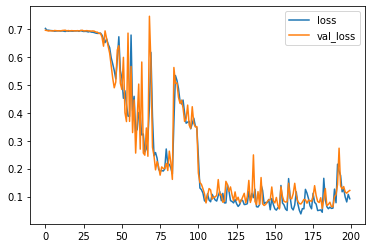

In [14]:
# plot some data (rnn - logn distance)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

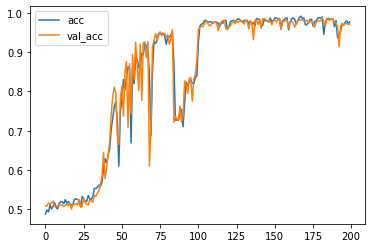

In [15]:
# plot some data (rnn - logn distance)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [16]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6949 - accuracy: 0.4808 - val_loss: 0.6933 - val_accuracy: 0.5048
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5132 - val_loss: 0.6930 - val_accuracy: 0.5136
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4996 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.5092
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5236 - val_loss: 0.6969 - val_accuracy: 0.5068
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6930 - val_accuracy: 0.4972
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5228 - val_loss: 0.6945 - val_accuracy: 0.5104
Epoch 8/200


Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2185 - accuracy: 0.9308 - val_loss: 0.2847 - val_accuracy: 0.9060
Epoch 60/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2261 - accuracy: 0.9264 - val_loss: 0.2806 - val_accuracy: 0.9128
Epoch 61/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.9216 - val_loss: 0.2992 - val_accuracy: 0.8960
Epoch 62/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2399 - accuracy: 0.9180 - val_loss: 0.2914 - val_accuracy: 0.9012
Epoch 63/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.9240 - val_loss: 0.2654 - val_accuracy: 0.9128
Epoch 64/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9264 - val_loss: 0.2682 - val_accuracy: 0.9072
Epoch 65/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2101 - accuracy: 0.9304 - val_loss: 0.2937 - val_accuracy: 0.9056
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9404 - val_loss: 0.2433 - val_accuracy: 0.9228
Epoch 117/200
79/79 [==============================] - 0s 6ms/step - loss: 0.1754 - accuracy: 0.9464 - val_loss: 0.2282 - val_accuracy: 0.9276
Epoch 118/200
79/79 [==============================] - 0s 6ms/step - loss: 0.1542 - accuracy: 0.9520 - val_loss: 0.1974 - val_accuracy: 0.9412
Epoch 119/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1395 - accuracy: 0.9564 - val_loss: 0.2109 - val_accuracy: 0.9420
Epoch 120/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1547 - accuracy: 0.9548 - val_loss: 0.1897 - val_accuracy: 0.9396
Epoch 121/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1446 - accuracy: 0.9556 - val_loss: 0.1880 - val_accuracy: 0.9420
Epoch 122/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1403 - accuracy: 0.9592 - val_loss: 0.2041 - val_accuracy: 0.9336
Epoch 123/200

79/79 [==============================] - 0s 5ms/step - loss: 0.1512 - accuracy: 0.9528 - val_loss: 0.2539 - val_accuracy: 0.9268
Epoch 174/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1513 - accuracy: 0.9536 - val_loss: 0.1989 - val_accuracy: 0.9392
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1398 - accuracy: 0.9572 - val_loss: 0.2281 - val_accuracy: 0.9300
Epoch 176/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1474 - accuracy: 0.9560 - val_loss: 0.1912 - val_accuracy: 0.9452
Epoch 177/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1210 - accuracy: 0.9664 - val_loss: 0.1762 - val_accuracy: 0.9520
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9676 - val_loss: 0.1908 - val_accuracy: 0.9436
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.9676 - val_loss: 0.1744 - val_accuracy: 0.9492
Epoch 180/200

79/79 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0323 - val_accuracy: 0.9916

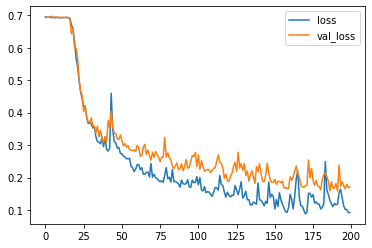

In [17]:
# plot some data (lstm - logn distance)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

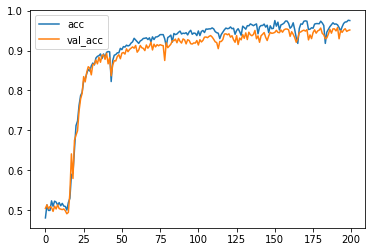

In [18]:
# plot some data (lstm - logn distance)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [19]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [20]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 5ms/step - loss: 0.7187 - accuracy: 0.5080 - val_loss: 0.6967 - val_accuracy: 0.4960
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6960 - val_accuracy: 0.5020
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5164 - val_loss: 0.6944 - val_accuracy: 0.5088
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5280 - val_loss: 0.6981 - val_accuracy: 0.4996
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172 - val_loss: 0.6955 - val_accuracy: 0.5108
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5316 - val_loss: 0.6973 - val_accuracy: 0.5084
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5340 - val_loss: 0.6963 - val_accuracy: 0.5128
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5440 - val_loss: 0.6992 - val_accuracy: 0.5028
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5392 - val_loss: 0.6962 - val_accuracy: 0.5084
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5336 - val_loss: 0.6975 - val_accuracy: 0.5048
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5368 - val_loss: 0.6968 - val_accuracy: 0.5084
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5368 - val_loss: 0.6963 - val_accuracy: 0.5200
Epoch 64/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5460 - val_loss: 0.6983 - val_accuracy: 0.5048
Epoch 65/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5484 - val_loss: 0.6981 - val_accuracy: 0.5056
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5068 - val_loss: 0.6920 - val_accuracy: 0.5148
Epoch 117/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5096 - val_loss: 0.6961 - val_accuracy: 0.5168
Epoch 118/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5216 - val_loss: 0.6919 - val_accuracy: 0.5132
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5092 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 120/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5204 - val_loss: 0.6921 - val_accuracy: 0.5160
Epoch 121/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5248 - val_loss: 0.6920 - val_accuracy: 0.5196
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5228 - val_loss: 0.6915 - val_accuracy: 0.5184
Epoch 123/200

79/79 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5056 - val_loss: 0.6940 - val_accuracy: 0.4876
Epoch 174/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5076
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5056 - val_loss: 0.6934 - val_accuracy: 0.4880
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4832 - val_loss: 0.6931 - val_accuracy: 0.5016
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5004 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.4892 - val_loss: 0.6999 - val_accuracy: 0.5184
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5096 - val_loss: 0.6941 - val_accuracy: 0.5040
Epoch 180/200

79/79 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5272 - val_loss: 0.6909 - val_accuracy: 0.5396

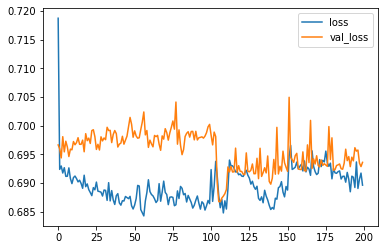

In [21]:
# plot some data (rnn - logn distance(20))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

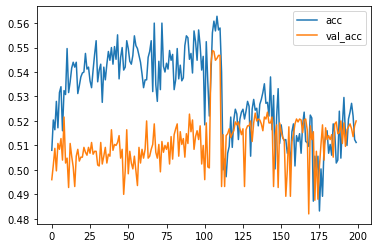

In [22]:
# plot some data (lstm - logn distance(20))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [23]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 11ms/step - loss: 0.6948 - accuracy: 0.5048 - val_loss: 0.6935 - val_accuracy: 0.5068
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4964 - val_loss: 0.6937 - val_accuracy: 0.5064
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5092 - val_loss: 0.6935 - val_accuracy: 0.5028
Epoch 4/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5084 - val_loss: 0.6928 - val_accuracy: 0.5068
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5068 - val_loss: 0.6929 - val_accuracy: 0.5088
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5148 - val_loss: 0.6928 - val_accuracy: 0.5056
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5068 - val_loss: 0.6927 - val_accuracy: 0.5116
Epoch 8/200


Epoch 59/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6492 - accuracy: 0.5924 - val_loss: 0.6569 - val_accuracy: 0.5768
Epoch 60/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6479 - accuracy: 0.5876 - val_loss: 0.6542 - val_accuracy: 0.5816
Epoch 61/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6495 - accuracy: 0.5824 - val_loss: 0.6522 - val_accuracy: 0.5840
Epoch 62/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6525 - accuracy: 0.5904 - val_loss: 0.6382 - val_accuracy: 0.5932
Epoch 63/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.6184 - val_loss: 0.6226 - val_accuracy: 0.6040
Epoch 64/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6049 - accuracy: 0.6336 - val_loss: 0.6166 - val_accuracy: 0.6044
Epoch 65/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.6352 - val_loss: 0.6109 - val_accuracy: 0.6136
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 0.6343 - accuracy: 0.6412 - val_loss: 0.6475 - val_accuracy: 0.6052
Epoch 117/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6417 - accuracy: 0.6260 - val_loss: 0.6430 - val_accuracy: 0.6132
Epoch 118/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6249 - accuracy: 0.6452 - val_loss: 0.6413 - val_accuracy: 0.6120
Epoch 119/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6215 - accuracy: 0.6484 - val_loss: 0.6337 - val_accuracy: 0.6188
Epoch 120/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6102 - accuracy: 0.6544 - val_loss: 0.6287 - val_accuracy: 0.6204
Epoch 121/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6101 - accuracy: 0.6348 - val_loss: 0.6175 - val_accuracy: 0.6328
Epoch 122/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6104 - accuracy: 0.6412 - val_loss: 0.6236 - val_accuracy: 0.6272
Epoch 123/200

79/79 [==============================] - 0s 6ms/step - loss: 0.4458 - accuracy: 0.7756 - val_loss: 0.4638 - val_accuracy: 0.7536
Epoch 174/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4281 - accuracy: 0.7888 - val_loss: 0.4528 - val_accuracy: 0.7824
Epoch 175/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4192 - accuracy: 0.8064 - val_loss: 0.4418 - val_accuracy: 0.7916
Epoch 176/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4201 - accuracy: 0.7968 - val_loss: 0.4304 - val_accuracy: 0.7792
Epoch 177/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8160 - val_loss: 0.4201 - val_accuracy: 0.8080
Epoch 178/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.8240 - val_loss: 0.4072 - val_accuracy: 0.8132
Epoch 179/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3612 - accuracy: 0.8376 - val_loss: 0.3747 - val_accuracy: 0.8256
Epoch 180/200

79/79 [==============================] - 1s 9ms/step - loss: 0.4281 - accuracy: 0.8144 - val_loss: 0.4594 - val_accuracy: 0.8024

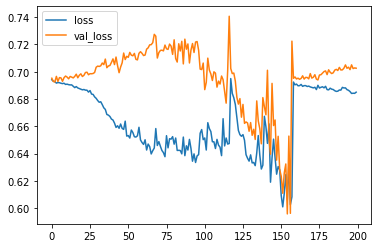

In [21]:
# plot some data (lstm - logn distance(20))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

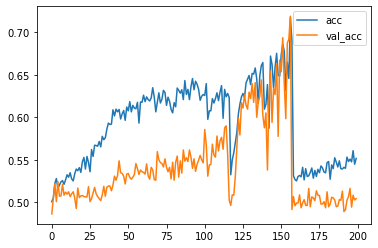

In [22]:
# plot some data (lstm - logn distance(20))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [23]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 10ms/step - loss: 0.6947 - accuracy: 0.5156 - val_loss: 0.6969 - val_accuracy: 0.4816
Epoch 2/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6926 - accuracy: 0.5152 - val_loss: 0.6951 - val_accuracy: 0.5068
Epoch 3/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5176 - val_loss: 0.6922 - val_accuracy: 0.5128
Epoch 4/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6921 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5196
Epoch 5/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5256 - val_loss: 0.6968 - val_accuracy: 0.4992
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5144 - val_loss: 0.6937 - val_accuracy: 0.5152
Epoch 7/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5288 - val_loss: 0.6941 - val_accuracy: 0.5096
Epoch 8/400


Epoch 59/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6678 - accuracy: 0.5860 - val_loss: 0.7217 - val_accuracy: 0.4948
Epoch 60/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6677 - accuracy: 0.5824 - val_loss: 0.7178 - val_accuracy: 0.5124
Epoch 61/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6669 - accuracy: 0.5820 - val_loss: 0.7135 - val_accuracy: 0.5104
Epoch 62/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6692 - accuracy: 0.5812 - val_loss: 0.7186 - val_accuracy: 0.5064
Epoch 63/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6698 - accuracy: 0.5852 - val_loss: 0.7152 - val_accuracy: 0.4968
Epoch 64/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6691 - accuracy: 0.5768 - val_loss: 0.7097 - val_accuracy: 0.5028
Epoch 65/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6672 - accuracy: 0.5856 - val_loss: 0.7123 - val_accuracy: 0.5128
Epoch 

79/79 [==============================] - 1s 8ms/step - loss: 0.6626 - accuracy: 0.5844 - val_loss: 0.7180 - val_accuracy: 0.5112
Epoch 174/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6616 - accuracy: 0.5896 - val_loss: 0.7189 - val_accuracy: 0.5120
Epoch 175/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6584 - accuracy: 0.5916 - val_loss: 0.7169 - val_accuracy: 0.5168
Epoch 176/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6586 - accuracy: 0.5876 - val_loss: 0.7226 - val_accuracy: 0.5148
Epoch 177/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6598 - accuracy: 0.5964 - val_loss: 0.7181 - val_accuracy: 0.5156
Epoch 178/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6751 - accuracy: 0.5788 - val_loss: 0.7119 - val_accuracy: 0.5256
Epoch 179/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6624 - accuracy: 0.5892 - val_loss: 0.7238 - val_accuracy: 0.5136
Epoch 180/400

79/79 [==============================] - 1s 7ms/step - loss: 0.6567 - accuracy: 0.5940 - val_loss: 0.7287 - val_accuracy: 0.5204
Epoch 288/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6691 - accuracy: 0.5876 - val_loss: 0.7279 - val_accuracy: 0.5040
Epoch 289/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6677 - accuracy: 0.5924 - val_loss: 0.7124 - val_accuracy: 0.5212
Epoch 290/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6588 - accuracy: 0.5948 - val_loss: 0.7259 - val_accuracy: 0.5212
Epoch 291/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6680 - accuracy: 0.5780 - val_loss: 0.7182 - val_accuracy: 0.5120
Epoch 292/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6530 - accuracy: 0.5992 - val_loss: 0.7231 - val_accuracy: 0.5196
Epoch 293/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6631 - accuracy: 0.5892 - val_loss: 0.7188 - val_accuracy: 0.5256
Epoch 294/400

79/79 [==============================] - 1s 9ms/step - loss: 0.6402 - accuracy: 0.6328 - val_loss: 0.7593 - val_accuracy: 0.4972

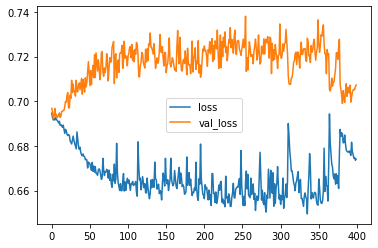

In [24]:
# plot some data (gru - logn distance(20))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

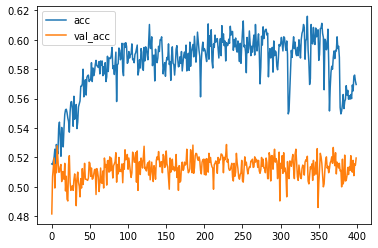

In [25]:
# plot some data (gru - logn distance(20))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [26]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [27]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 10ms/step - loss: 0.6942 - accuracy: 0.5084 - val_loss: 0.6939 - val_accuracy: 0.5020
Epoch 2/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6937 - val_accuracy: 0.5028
Epoch 3/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6937 - val_accuracy: 0.5056
Epoch 4/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5040 - val_loss: 0.6945 - val_accuracy: 0.5028
Epoch 5/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5144 - val_loss: 0.6949 - val_accuracy: 0.5024
Epoch 6/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6926 - accuracy: 0.5168 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/400


Epoch 59/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6709 - accuracy: 0.5860 - val_loss: 0.7275 - val_accuracy: 0.5108
Epoch 60/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6732 - accuracy: 0.5780 - val_loss: 0.7189 - val_accuracy: 0.5048
Epoch 61/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6629 - accuracy: 0.5920 - val_loss: 0.7180 - val_accuracy: 0.5024
Epoch 62/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6613 - accuracy: 0.5960 - val_loss: 0.7265 - val_accuracy: 0.5100
Epoch 63/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6621 - accuracy: 0.5928 - val_loss: 0.7266 - val_accuracy: 0.5124
Epoch 64/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6609 - accuracy: 0.5972 - val_loss: 0.7256 - val_accuracy: 0.5044
Epoch 65/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6705 - accuracy: 0.5844 - val_loss: 0.7216 - val_accuracy: 0.5012
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 0.6704 - accuracy: 0.5804 - val_loss: 0.7144 - val_accuracy: 0.5072
Epoch 174/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6822 - accuracy: 0.5580 - val_loss: 0.7148 - val_accuracy: 0.4988
Epoch 175/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6759 - accuracy: 0.5700 - val_loss: 0.7111 - val_accuracy: 0.5060
Epoch 176/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6722 - accuracy: 0.5776 - val_loss: 0.7139 - val_accuracy: 0.5108
Epoch 177/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6704 - accuracy: 0.5836 - val_loss: 0.7133 - val_accuracy: 0.5120
Epoch 178/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6781 - accuracy: 0.5684 - val_loss: 0.7107 - val_accuracy: 0.5104
Epoch 179/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6787 - accuracy: 0.5612 - val_loss: 0.7042 - val_accuracy: 0.5156
Epoch 180/400

79/79 [==============================] - 1s 8ms/step - loss: 0.6784 - accuracy: 0.5652 - val_loss: 0.7081 - val_accuracy: 0.5024
Epoch 288/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6765 - accuracy: 0.5628 - val_loss: 0.7083 - val_accuracy: 0.5008
Epoch 289/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6751 - accuracy: 0.5708 - val_loss: 0.7108 - val_accuracy: 0.4928
Epoch 290/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6779 - accuracy: 0.5620 - val_loss: 0.7091 - val_accuracy: 0.4892
Epoch 291/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6751 - accuracy: 0.5764 - val_loss: 0.7122 - val_accuracy: 0.4884
Epoch 292/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6816 - accuracy: 0.5580 - val_loss: 0.7103 - val_accuracy: 0.4944
Epoch 293/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6796 - accuracy: 0.5644 - val_loss: 0.7133 - val_accuracy: 0.4824
Epoch 294/400

79/79 [==============================] - 1s 10ms/step - loss: 0.6666 - accuracy: 0.5628 - val_loss: 0.7229 - val_accuracy: 0.4996

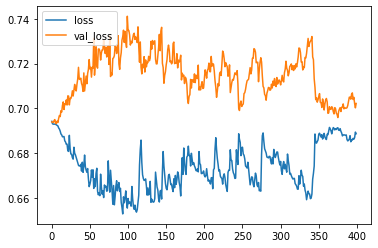

In [28]:
# plot some data (lstm - logn distance(30))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

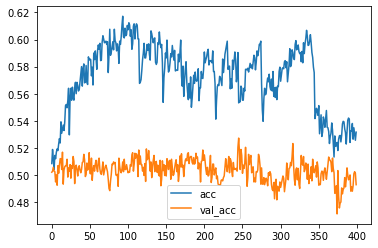

In [29]:
# plot some data (lstm - logn distance(30))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [30]:
# Now test our LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 14ms/step - loss: 0.6937 - accuracy: 0.5024 - val_loss: 0.6935 - val_accuracy: 0.5028
Epoch 2/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6934 - val_accuracy: 0.5044
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5128 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.5072 - val_loss: 0.6940 - val_accuracy: 0.5028
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5132 - val_loss: 0.6935 - val_accuracy: 0.4980
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5132 - val_loss: 0.6932 - val_accuracy: 0.5052
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5076 - val_loss: 0.6933 - val_accuracy: 0.5036
Epoch 8/100

Epoch 59/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0642 - accuracy: 0.9792 - val_loss: 0.0883 - val_accuracy: 0.9716
Epoch 60/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0729 - accuracy: 0.9780 - val_loss: 0.0876 - val_accuracy: 0.9712
Epoch 61/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0594 - accuracy: 0.9844 - val_loss: 0.0797 - val_accuracy: 0.9736
Epoch 62/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0583 - accuracy: 0.9840 - val_loss: 0.0763 - val_accuracy: 0.9752
Epoch 63/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0647 - accuracy: 0.9812 - val_loss: 0.0769 - val_accuracy: 0.9740
Epoch 64/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0607 - accuracy: 0.9824 - val_loss: 0.0786 - val_accuracy: 0.9768
Epoch 65/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0743 - val_accuracy: 0.9768
Epoch 

79/79 [==============================] - 1s 12ms/step - loss: 0.1289 - accuracy: 0.9508 - val_loss: 0.1830 - val_accuracy: 0.9352

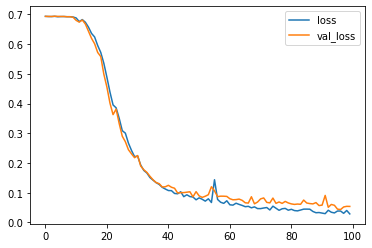

In [31]:
# plot some data (lstm + maxpool - logn distance(30))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

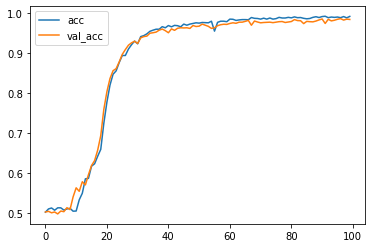

In [32]:
# plot some data  (lstm + maxpool - logn distance(30))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()